In [176]:
# Initial imports
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import seaborn as sns
from path import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sqlalchemy import create_engine

In [177]:
# Loading data
file_path = "Resources/marketing_data.csv"
market_df = pd.read_csv(file_path)

market_df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
5,7348,1958,PhD,Single,"$71,691.00",0,0,3/17/14,0,336,...,5,2,0,0,0,0,0,1,0,SP
6,4073,1954,2n Cycle,Married,"$63,564.00",0,0,1/29/14,0,769,...,7,6,1,0,0,0,0,1,0,GER
7,1991,1967,Graduation,Together,"$44,931.00",0,1,1/18/14,0,78,...,3,5,0,0,0,0,0,0,0,SP
8,4047,1954,PhD,Married,"$65,324.00",0,1,1/11/14,0,384,...,9,4,0,0,0,0,0,0,0,US
9,9477,1954,PhD,Married,"$65,324.00",0,1,1/11/14,0,384,...,9,4,0,0,0,0,0,0,0,IND


In [178]:
market_df.count()

ID                     2240
Year_Birth             2240
Education              2240
Marital_Status         2240
 Income                2216
Kidhome                2240
Teenhome               2240
Dt_Customer            2240
Recency                2240
MntWines               2240
MntFruits              2240
MntMeatProducts        2240
MntFishProducts        2240
MntSweetProducts       2240
MntGoldProds           2240
NumDealsPurchases      2240
NumWebPurchases        2240
NumCatalogPurchases    2240
NumStorePurchases      2240
NumWebVisitsMonth      2240
AcceptedCmp3           2240
AcceptedCmp4           2240
AcceptedCmp5           2240
AcceptedCmp1           2240
AcceptedCmp2           2240
Response               2240
Complain               2240
Country                2240
dtype: int64

In [179]:
for column in market_df.columns:
    print(f"Column {column} has {market_df[column].isnull().sum()} null values" )

Column ID has 0 null values
Column Year_Birth has 0 null values
Column Education has 0 null values
Column Marital_Status has 0 null values
Column  Income  has 24 null values
Column Kidhome has 0 null values
Column Teenhome has 0 null values
Column Dt_Customer has 0 null values
Column Recency has 0 null values
Column MntWines has 0 null values
Column MntFruits has 0 null values
Column MntMeatProducts has 0 null values
Column MntFishProducts has 0 null values
Column MntSweetProducts has 0 null values
Column MntGoldProds has 0 null values
Column NumDealsPurchases has 0 null values
Column NumWebPurchases has 0 null values
Column NumCatalogPurchases has 0 null values
Column NumStorePurchases has 0 null values
Column NumWebVisitsMonth has 0 null values
Column AcceptedCmp3 has 0 null values
Column AcceptedCmp4 has 0 null values
Column AcceptedCmp5 has 0 null values
Column AcceptedCmp1 has 0 null values
Column AcceptedCmp2 has 0 null values
Column Response has 0 null values
Column Complain has

In [180]:
market_df.dtypes

ID                      int64
Year_Birth              int64
Education              object
Marital_Status         object
 Income                object
Kidhome                 int64
Teenhome                int64
Dt_Customer            object
Recency                 int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases         int64
NumCatalogPurchases     int64
NumStorePurchases       int64
NumWebVisitsMonth       int64
AcceptedCmp3            int64
AcceptedCmp4            int64
AcceptedCmp5            int64
AcceptedCmp1            int64
AcceptedCmp2            int64
Response                int64
Complain                int64
Country                object
dtype: object

In [181]:
print(f"Duplicates entries: {market_df.duplicated().sum()}")

Duplicates entries: 0


In [182]:
# clean up column names that contain whitespace
market_df.columns = market_df.columns.str.replace(' ', '')

# transform Income column to a numerical
market_df['Income'] = market_df['Income'].str.replace('$', '')
market_df['Income'] = market_df['Income'].str.replace(',', '').astype('float')

/Users/bhaskarborah/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """


In [183]:
# Covert date to datetime
market_df["Dt_Customer"] = pd.to_datetime(market_df["Dt_Customer"])
# Check the columns' datatypes after converting
market_df.Dt_Customer

0      2014-06-16
1      2014-06-15
2      2014-05-13
3      2014-05-11
4      2014-04-08
          ...    
2235   2013-03-07
2236   2013-01-22
2237   2012-12-03
2238   2012-11-29
2239   2012-09-01
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

In [184]:
# Retrieve value counts for 'marital_status' column
market_df.Marital_Status.value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [185]:
# Drop the rows where 'marital_status' is 'Absurd' or 'YOLO'
market_df = market_df.loc[(market_df["Marital_Status"] != 'Absurd') & (market_df["Marital_Status"] != 'YOLO')]

# Change 'Alone' to 'Single'
market_df['Marital_Status'].replace("Alone","Single", inplace=True)

# Retrieve value counts for 'marital_status' column
market_df.Marital_Status.value_counts()

Married     864
Together    580
Single      483
Divorced    232
Widow        77
Name: Marital_Status, dtype: int64

In [186]:
# Retrieve value counts for 'marital_status' column
market_df.Marital_Status.value_counts()

Married     864
Together    580
Single      483
Divorced    232
Widow        77
Name: Marital_Status, dtype: int64

In [187]:
# Sort DOB in ascending order
market_df.sort_values(by='Year_Birth')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
513,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,2,4,0,0,0,0,0,0,0,SA
827,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,4,1,0,0,1,0,0,0,0,SP
2233,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,2,5,0,0,0,0,0,0,1,IND
2171,6663,1940,PhD,Single,51141.0,0,0,2013-07-08,96,144,...,4,5,0,0,0,0,0,0,0,SP
1740,6932,1941,PhD,Married,93027.0,0,0,2013-04-13,77,1285,...,5,2,0,0,1,0,0,0,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,10548,1995,Graduation,Single,71163.0,0,0,2014-03-09,30,283,...,12,1,0,0,0,0,0,0,0,GER
1298,4427,1995,2n Cycle,Single,83257.0,0,0,2012-09-18,56,536,...,12,6,1,0,1,0,0,1,1,SP
964,3661,1995,2n Cycle,Single,80617.0,0,0,2012-10-12,42,594,...,8,2,0,0,0,0,0,0,0,IND
1824,193,1996,Basic,Married,14421.0,0,0,2014-02-17,81,0,...,2,5,1,0,0,0,0,0,0,SP


In [188]:
# Drop the columns where the birth year is inconsistant
market_df = market_df.loc[(market_df["Year_Birth"] > 1900)]
market_df.sort_values(by='Year_Birth')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
2171,6663,1940,PhD,Single,51141.0,0,0,2013-07-08,96,144,...,4,5,0,0,0,0,0,0,0,SP
1740,6932,1941,PhD,Married,93027.0,0,0,2013-04-13,77,1285,...,5,2,0,0,1,0,0,0,0,SP
1350,1453,1943,PhD,Widow,57513.0,0,0,2013-07-06,59,735,...,13,6,0,0,0,0,0,0,0,SP
1209,8800,1943,PhD,Divorced,48948.0,0,0,2013-02-01,53,437,...,5,6,1,0,0,0,0,1,0,SA
1208,2968,1943,PhD,Divorced,48948.0,0,0,2013-02-01,53,437,...,5,6,1,0,0,0,0,1,0,AUS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,10548,1995,Graduation,Single,71163.0,0,0,2014-03-09,30,283,...,12,1,0,0,0,0,0,0,0,GER
1467,8315,1995,Graduation,Single,34824.0,0,0,2014-03-26,65,4,...,2,6,0,0,0,0,0,0,0,US
1468,5184,1995,Graduation,Single,34824.0,0,0,2014-03-26,65,4,...,2,6,0,0,0,0,0,0,0,SP
562,9909,1996,2n Cycle,Married,7500.0,0,0,2012-11-09,24,3,...,3,9,0,0,0,0,0,1,0,AUS


In [189]:
market_df.loc[df_marketing['Year_Birth']].sort_values(by='Year_Birth')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
1948,455,1946,PhD,Married,51012.0,0,0,2013-04-18,86,102,...,4,6,0,0,0,0,0,0,0,SP
1948,455,1946,PhD,Married,51012.0,0,0,2013-04-18,86,102,...,4,6,0,0,0,0,0,0,0,SP
1949,7592,1946,PhD,Married,51012.0,0,0,2013-04-18,86,102,...,4,6,0,0,0,0,0,0,0,SP
1948,455,1946,PhD,Married,51012.0,0,0,2013-04-18,86,102,...,4,6,0,0,0,0,0,0,0,SP
1948,455,1946,PhD,Married,51012.0,0,0,2013-04-18,86,102,...,4,6,0,0,0,0,0,0,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1959,3010,1989,Master,Together,88420.0,0,0,2014-05-02,87,957,...,8,1,1,0,1,1,0,0,0,SP
1959,3010,1989,Master,Together,88420.0,0,0,2014-05-02,87,957,...,8,1,1,0,1,1,0,0,0,SP
1959,3010,1989,Master,Together,88420.0,0,0,2014-05-02,87,957,...,8,1,1,0,1,1,0,0,0,SP
1959,3010,1989,Master,Together,88420.0,0,0,2014-05-02,87,957,...,8,1,1,0,1,1,0,0,0,SP


<AxesSubplot:>

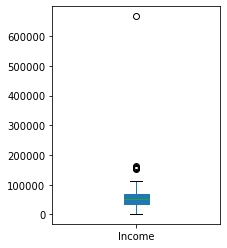

In [190]:
market_df['Income'].plot(kind='box', figsize=(3,4), patch_artist=True)

In [191]:
market_df.sort_values(by='Income')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
1466,6862,1971,Graduation,Divorced,1730.0,0,0,2014-05-18,65,1,...,0,20,0,0,0,0,0,0,0,SP
961,5376,1979,Graduation,Married,2447.0,1,0,2013-01-06,42,1,...,0,1,0,0,0,0,0,0,0,US
1291,11110,1973,Graduation,Single,3502.0,1,0,2013-04-13,56,2,...,0,14,0,0,0,0,0,0,0,IND
663,9931,1963,PhD,Married,4023.0,1,1,2014-06-23,29,5,...,0,19,0,0,0,0,0,0,0,SP
14,10311,1969,Graduation,Married,4428.0,0,1,2013-10-05,0,16,...,0,1,0,0,0,0,0,0,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1967,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,...,8,1,0,0,0,0,0,0,0,GER
1983,2902,1958,Graduation,Together,NaN,1,1,2012-09-03,87,19,...,3,5,0,0,0,0,0,0,0,AUS
2139,3117,1955,Graduation,Single,NaN,0,1,2013-10-18,95,264,...,5,7,0,0,0,0,0,0,0,AUS
2165,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,...,4,6,0,0,0,0,0,0,0,AUS


In [192]:
# get all the records which has null Income records
market_df.loc[market_df['Income'].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
134,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,8,9,0,0,0,0,0,0,0,GER
262,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,2,7,0,0,0,0,0,0,0,US
394,3769,1972,PhD,Together,NaN,1,0,2014-03-02,17,25,...,3,7,0,0,0,0,0,0,0,AUS
449,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,0,1,0,0,0,0,0,0,0,AUS
525,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,...,7,6,0,0,0,0,0,0,0,CA
590,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,3,8,0,0,0,0,0,0,0,GER
899,10475,1970,Master,Together,NaN,0,1,2013-04-01,39,187,...,6,5,0,0,0,0,0,0,0,US
997,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,2,7,0,0,0,0,0,0,0,GER
1096,4345,1964,2n Cycle,Single,NaN,1,1,2014-01-12,49,5,...,2,7,0,0,0,0,0,0,0,AUS
1185,7187,1969,Master,Together,NaN,1,1,2013-05-18,52,375,...,4,3,0,0,0,0,0,0,0,AUS


In [193]:
# get the qualifications which are PHDs from the Null income records
df_phd=market_df.loc[market_df['Education']=='PhD']

In [194]:
df_phd

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
5,7348,1958,PhD,Single,71691.0,0,0,2014-03-17,0,336,...,5,2,0,0,0,0,0,1,0,SP
8,4047,1954,PhD,Married,65324.0,0,1,2014-01-11,0,384,...,9,4,0,0,0,0,0,0,0,US
9,9477,1954,PhD,Married,65324.0,0,1,2014-01-11,0,384,...,9,4,0,0,0,0,0,0,0,IND
12,10530,1959,PhD,Widow,67786.0,0,0,2013-12-07,0,431,...,6,1,0,0,0,0,0,1,0,IND
17,10175,1958,PhD,Divorced,32173.0,0,1,2013-08-01,0,18,...,3,4,0,0,0,0,0,0,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2213,5602,1989,PhD,Together,66973.0,0,0,2013-05-17,98,466,...,12,3,0,0,0,0,0,0,0,IND
2216,7230,1960,PhD,Divorced,50611.0,0,1,2012-10-04,98,459,...,7,6,0,1,0,0,0,1,0,US
2217,5675,1960,PhD,Divorced,50611.0,0,1,2012-10-04,98,459,...,7,6,0,1,0,0,0,0,0,US
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,...,11,4,0,0,0,0,0,0,0,US


In [200]:
# get the mean income of the records whose qualifications which are PHDs from the Null income records
df_phd_mean=df_phd['Income'].mean()
df_phd_mean

56120.29288702929

In [201]:
# get the qualifications which are Graduation from the Null income records
df_grad=market_df.loc[market_df['Education']=='Graduation']

In [202]:
# get the mean income of the records whose qualifications which are Graduation from the Null income records
df_grad_mean=df_grad['Income'].mean()
df_grad_mean

52696.58565022422

In [217]:
# get the qualifications which are Master from the Null income records
df_master=market_df.loc[market_df['Education']=='Master']

In [218]:
# get the mean income of the records whose qualifications which are Master from the Null income records
df_master_mean=df_master['Income'].mean()
df_master_mean

52818.72255110214

In [205]:
# Mean income of all the incomes
df_mean=market_df['Income'].mean()
df_mean

52221.8017202354

In [206]:
# Median income of all the incomes
df_median=market_df['Income'].median()
df_median

51373.0

In [199]:
market_df.loc[market_df.Country == 'CA'].Income.mean()

53021.003787878784

In [203]:
# Find the columns that has null values
for column in market_df.columns:
    print(f"Column {column} has {market_df[column].isnull().sum()} null values" )

Column ID has 0 null values
Column Year_Birth has 0 null values
Column Education has 0 null values
Column Marital_Status has 0 null values
Column Income has 24 null values
Column Kidhome has 0 null values
Column Teenhome has 0 null values
Column Dt_Customer has 0 null values
Column Recency has 0 null values
Column MntWines has 0 null values
Column MntFruits has 0 null values
Column MntMeatProducts has 0 null values
Column MntFishProducts has 0 null values
Column MntSweetProducts has 0 null values
Column MntGoldProds has 0 null values
Column NumDealsPurchases has 0 null values
Column NumWebPurchases has 0 null values
Column NumCatalogPurchases has 0 null values
Column NumStorePurchases has 0 null values
Column NumWebVisitsMonth has 0 null values
Column AcceptedCmp3 has 0 null values
Column AcceptedCmp4 has 0 null values
Column AcceptedCmp5 has 0 null values
Column AcceptedCmp1 has 0 null values
Column AcceptedCmp2 has 0 null values
Column Response has 0 null values
Column Complain has 0

In [207]:
# We are replacing the null values in income with mean income
market_df["Income"] = market_df["Income"].fillna(market_df["Income"].mean())

In [208]:
# Find the columns that has null values
for column in market_df.columns:
    print(f"Column {column} has {market_df[column].isnull().sum()} null values" )

Column ID has 0 null values
Column Year_Birth has 0 null values
Column Education has 0 null values
Column Marital_Status has 0 null values
Column Income has 0 null values
Column Kidhome has 0 null values
Column Teenhome has 0 null values
Column Dt_Customer has 0 null values
Column Recency has 0 null values
Column MntWines has 0 null values
Column MntFruits has 0 null values
Column MntMeatProducts has 0 null values
Column MntFishProducts has 0 null values
Column MntSweetProducts has 0 null values
Column MntGoldProds has 0 null values
Column NumDealsPurchases has 0 null values
Column NumWebPurchases has 0 null values
Column NumCatalogPurchases has 0 null values
Column NumStorePurchases has 0 null values
Column NumWebVisitsMonth has 0 null values
Column AcceptedCmp3 has 0 null values
Column AcceptedCmp4 has 0 null values
Column AcceptedCmp5 has 0 null values
Column AcceptedCmp1 has 0 null values
Column AcceptedCmp2 has 0 null values
Column Response has 0 null values
Column Complain has 0 

In [209]:
# Check for duplicate rows
df2 = pd.DataFrame(market_df,
                  columns = ['Year_Birth', 'Education', 'Marital_Status','Income','Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'])
duplicate = df2[df2.duplicated()]
  
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
27,1956,Graduation,Together,54450.0,1,1,2012-09-14,0,454,0,...,8,8,0,0,0,0,0,0,0,SP
157,1972,Master,Single,46423.0,1,1,2013-09-18,6,68,0,...,4,7,0,0,0,0,0,0,0,SP
181,1955,Graduation,Together,42586.0,1,1,2012-10-29,7,194,2,...,6,8,0,0,0,0,0,1,0,SP
204,1971,Graduation,Together,34600.0,1,1,2013-01-01,8,199,33,...,5,8,0,0,0,0,0,1,0,SP
314,1970,2n Cycle,Married,62466.0,0,1,2014-01-15,13,129,129,...,12,4,0,0,0,0,0,0,0,SP
332,1989,Graduation,Single,30279.0,1,0,2012-12-30,13,10,4,...,3,8,0,0,0,0,0,0,0,SP
363,1990,Graduation,Married,18929.0,0,0,2013-02-16,15,32,0,...,4,6,0,0,0,0,0,0,0,SP
369,1974,PhD,Divorced,25509.0,1,0,2012-09-18,15,40,3,...,3,9,0,0,0,0,0,1,0,SP
479,1963,PhD,Single,48918.0,1,1,2014-04-12,21,52,0,...,4,4,0,0,0,0,0,0,0,SP
518,1960,Master,Single,98777.0,0,0,2014-02-17,23,1000,19,...,9,1,0,1,0,0,0,0,0,SP


In [210]:

# Drop the duplicate rows
market_df = market_df.drop_duplicates(subset=['Year_Birth', 'Education', 'Marital_Status','Income','Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'], keep='last')
market_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-12-03,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,10,3,0,0,0,0,0,0,0,IND


In [211]:
# Find mean of all the values across countries
country_df = market_df.groupby(by="Country",as_index=False).sum()
country_df

,Country,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
0,AUS,885613,310833,8.148496e+06,82,82,7350,43573,3773,22848,...,407,862,823,9,6,12,6,0,22,0
1,CA,1528404,517601,1.400982e+07,109,147,12346,83914,7673,45528,...,724,1548,1387,17,24,21,18,6,38,2
2,GER,607887,236247,6.351214e+06,48,54,5928,37483,3062,20874,...,332,721,621,10,11,8,7,2,17,1
3,IND,807472,285882,7.090531e+06,76,72,7286,35599,3587,24901,...,357,770,800,13,11,6,7,2,12,0
4,ME,17323,5917,1.730410e+05,0,2,80,1729,8,817,...,15,19,18,1,0,0,0,0,2,0
5,SA,1893859,657767,1.830274e+07,164,158,16488,105026,8887,57977,...,909,1973,1764,21,20,21,20,4,52,3
6,SP,5844741,2075147,5.436249e+07,450,537,52532,325143,27122,172419,...,2735,6102,5613,80,87,86,76,15,170,14
7,US,623457,214552,5.798810e+06,44,56,5453,32406,3044,20256,...,331,658,610,8,6,5,7,0,13,0


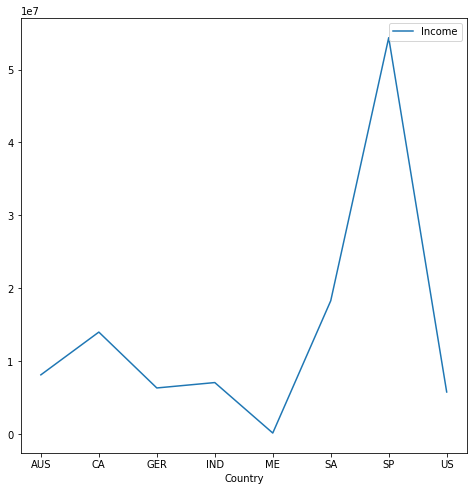

In [212]:
# plot the dataframe
country_df.plot(x="Country", y=["Income"], kind="line", figsize=(8,8))
  
# print bar graph
plt.show()

In [213]:
# Sort income in ascending order
market_df.sort_values(by='Income',ascending = False)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
527,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,3,6,0,0,0,0,0,0,0,SA
731,1503,1976,PhD,Together,162397.0,1,1,2013-06-03,31,85,...,1,1,0,0,0,0,0,0,0,SP
497,1501,1982,PhD,Married,160803.0,0,0,2012-08-04,21,55,...,1,0,0,0,0,0,0,0,0,US
853,5336,1971,Master,Together,157733.0,1,0,2013-06-04,37,39,...,1,1,0,0,0,0,0,0,0,SP
2204,8475,1973,PhD,Married,157243.0,0,1,2014-03-01,98,20,...,0,0,0,0,0,0,0,0,0,IND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,10311,1969,Graduation,Married,4428.0,0,1,2013-10-05,0,16,...,0,1,0,0,0,0,0,0,0,SP
663,9931,1963,PhD,Married,4023.0,1,1,2014-06-23,29,5,...,0,19,0,0,0,0,0,0,0,SP
1291,11110,1973,Graduation,Single,3502.0,1,0,2013-04-13,56,2,...,0,14,0,0,0,0,0,0,0,IND
961,5376,1979,Graduation,Married,2447.0,1,0,2013-01-06,42,1,...,0,1,0,0,0,0,0,0,0,US


In [214]:
# Remove the outlier in income
market_df = market_df.loc[(market_df["Income"] < 200000)]
market_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-12-03,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,10,3,0,0,0,0,0,0,0,IND


In [215]:
# Check the counts for country
market_df.Country.value_counts()

SP     1054
SA      333
CA      263
AUS     158
IND     145
GER     120
US      109
ME        3
Name: Country, dtype: int64

In [216]:
# Remove the country Montenegro as it has only 3 values
market_df = market_df.loc[(market_df["Country"] != 'ME')]
market_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-12-03,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,10,3,0,0,0,0,0,0,0,IND


In [ ]:
# create a variable to hold the RDS instance address
rds_address = 'marketing-data.c255i23tlogx.us-east-1.rds.amazonaws.com'
# make a connection string for the engine to connect to the database
# "postgresql://[user]:[password]@[location]:[port]/[database]"
db_string = f"postgresql://postgres:postgres@{rds_address}:5432/postgres"
# Create the database engine
engine = create_engine(db_string)
# save the clean DataFrame to a SQL table
market_df.to_sql(name='marketing_data', con=engine, if_exists='replace')

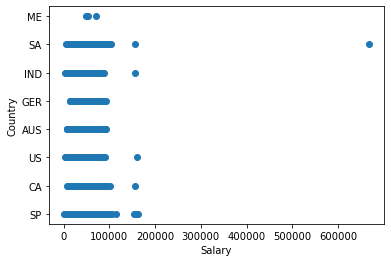

In [28]:
plt.scatter(df_marketing.Income,df_marketing.Country)
plt.xlabel('Salary')
plt.ylabel('Country')
plt.show()

In [38]:
df_marketing['Marital_Status'].unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [62]:
df_marketing['Country'].unique()

array(['SP', 'CA', 'US', 'AUS', 'GER', 'IND', 'SA', 'ME'], dtype=object)

In [69]:
df_marketing.loc[df_marketing['Country']=='CA'].sort_values(by='Income', ascending=False)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
1925,11181,1949,PhD,Married,156924.0,0,0,8/29/13,85,2,...,0,0,0,0,0,0,0,0,0,CA
1564,7215,1983,Graduation,Single,101970.0,0,0,3/12/13,69,722,...,13,2,0,1,1,1,0,1,0,CA
2239,4070,1969,PhD,Married,94871.0,0,2,9/1/12,99,169,...,4,7,0,1,1,0,0,1,0,CA
376,10133,1970,Graduation,Single,93790.0,0,0,2/12/14,16,1302,...,12,2,0,1,1,1,0,1,0,CA
2192,9499,1954,Graduation,Married,93404.0,1,2,5/7/13,97,1279,...,7,5,0,1,1,0,0,0,0,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,642,1980,Basic,Married,16005.0,1,0,8/14/12,69,1,...,2,8,0,0,0,0,0,0,0,CA
318,7600,1992,Basic,Single,15253.0,1,0,10/28/13,13,1,...,3,7,0,0,0,0,0,0,0,CA
740,5342,1976,Basic,Divorced,9548.0,1,0,8/8/12,31,0,...,3,8,0,0,0,0,0,0,0,CA
1187,2980,1952,Master,Single,8820.0,1,1,3/22/13,52,12,...,3,8,0,0,0,0,0,0,0,CA


In [74]:
df_marketing.loc[df_marketing['Country']=='SP'].sort_values(by='Income', ascending=False)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
731,1503,1976,PhD,Together,162397.0,1,1,6/3/13,31,85,...,1,1,0,0,0,0,0,0,0,SP
853,5336,1971,Master,Together,157733.0,1,0,6/4/13,37,39,...,1,1,0,0,0,0,0,0,0,SP
1826,5555,1975,Graduation,Divorced,153924.0,0,0,2/7/14,81,1,...,0,0,0,0,0,0,0,0,0,SP
210,4619,1945,PhD,Single,113734.0,0,0,5/28/14,9,6,...,0,1,0,0,0,0,0,0,0,SP
832,4611,1970,Graduation,Together,105471.0,0,0,1/21/13,36,1009,...,13,3,0,0,1,1,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2063,6237,1966,PhD,Single,7144.0,0,2,12/7/13,92,81,...,1,0,0,0,0,0,0,0,0,SP
60,4246,1982,Master,Single,6560.0,0,0,12/12/13,2,67,...,1,17,0,0,0,0,0,0,0,SP
14,10311,1969,Graduation,Married,4428.0,0,1,10/5/13,0,16,...,0,1,0,0,0,0,0,0,0,SP
663,9931,1963,PhD,Married,4023.0,1,1,6/23/14,29,5,...,0,19,0,0,0,0,0,0,0,SP


In [75]:
df_marketing.loc[df_marketing['Country']=='ME'].sort_values(by='Income', ascending=False)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
293,5080,1993,Graduation,Single,70515.0,0,0,10/21/13,12,420,...,4,2,0,0,0,0,0,1,0,ME
1436,2920,1975,PhD,Single,52614.0,0,1,12/1/12,63,789,...,8,8,0,0,0,0,0,0,0,ME
149,9323,1949,Master,Together,49912.0,0,1,9/7/12,5,520,...,7,8,1,0,0,0,0,1,0,ME


In [ ]:
df.loc[df['column_name'] == some_value]

In [39]:
df_marketing['Kidhome'].unique()

array([0, 1, 2])

In [40]:
df_marketing['Teenhome'].unique()

array([0, 1, 2])

In [47]:

column_names = ["ID","Dependents", "Year_Customer", "TotalMnt", "TotalPurchases", "TotalCampaignsAcc"]

df = pd.DataFrame(columns = column_names)

df['ID'] = df_marketing["ID"]

# Get the total number of Dependents
df['Dependents'] = df_marketing['Kidhome'] + df_marketing['Teenhome']

# Year becoming a Customer
df['Year_Customer'] = pd.DatetimeIndex(df_marketing['Dt_Customer']).year

# Total Amount Spent
mnt_cols = [col for col in df_marketing.columns if 'Mnt' in col]
df['TotalMnt'] = df_marketing[mnt_cols].sum(axis=1)

# Total Purchases
purchases_cols = [col for col in df_marketing.columns if 'Purchases' in col]
df['TotalPurchases'] = df_marketing[purchases_cols].sum(axis=1)

# Total Campaigns Accepted
campaigns_cols = [col for col in df_marketing.columns if 'Cmp' in col] + ['Response'] 
# 'Response' is for the latest campaign

df['TotalCampaignsAcc'] = df_marketing[campaigns_cols].sum(axis=1)

df.head()

,ID,Dependents,Year_Customer,TotalMnt,TotalPurchases,TotalCampaignsAcc
0,1826,0,2014,1190,15,1
1,1,0,2014,577,18,2
2,10476,1,2014,251,11,0
3,1386,2,2014,11,4,0
4,5371,1,2014,91,8,2


In [52]:
df.sort_values(by='Dependents', ascending=False)

,ID,Dependents,Year_Customer,TotalMnt,TotalPurchases,TotalCampaignsAcc
1102,9283,3,2013,18,4,0
648,2826,3,2013,37,7,0
263,2552,3,2013,446,24,2
1943,6940,3,2013,223,12,1
1671,5956,3,2013,284,16,0
...,...,...,...,...,...,...
1341,5524,0,2012,1617,25,1
196,3009,0,2013,1766,15,4
1350,1453,0,2013,1060,27,0
1353,387,0,2012,61,6,0


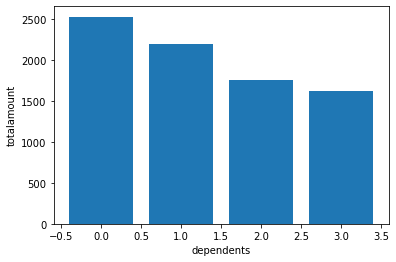

In [61]:
plt.bar(df.Dependents,df.TotalMnt)
plt.xlabel('dependents')
plt.ylabel('totalamount')
plt.show()

In [119]:
# create a variable to hold the RDS instance address
rds_address = 'marketing-data.c255i23tlogx.us-east-1.rds.amazonaws.com'
# make a connection string for the engine to connect to the database
# "postgresql://[user]:[password]@[location]:[port]/[database]"
db_string = f"postgresql://postgres:postgres@{rds_address}:5432/postgres"
# Create the database engine
engine = create_engine(db_string)

In [120]:
# Test the connection by import data in Postgres table into a Panda DataFrame
# Connect to PostgreSQL server
dbConnection = engine.connect()
# Read data from PostgreSQL database table and load into a DataFrame instance
marketing_df = pd.read_sql("select * from \"marketing_data\"", dbConnection)
# Print the DataFrame
marketing_df

,index,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,...,6,1,0,0,0,0,0,1,0,SP
1,1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,...,7,5,0,0,0,0,1,1,0,CA
2,2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,...,5,2,0,0,0,0,0,0,0,US
3,3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,...,2,7,0,0,0,0,0,0,0,AUS
4,4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,...,11,4,0,0,0,0,0,0,0,US
2178,2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,...,3,8,0,0,0,0,0,0,0,SP
2179,2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-12-03,99,...,5,8,0,0,0,0,0,0,0,SP
2180,2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,...,10,3,0,0,0,0,0,0,0,IND


In [125]:

column_names = ["ID","MntSum","PurchasesSum"]

df_total_table = pd.DataFrame(columns = column_names)

In [126]:
df_total_table

,ID,MntSum,PurchasesSum


In [127]:
df_total_table['ID']=marketing_df['ID']

In [129]:
MntSum_column = marketing_df["MntWines"] + marketing_df["MntFruits"] +  marketing_df["MntMeatProducts"]+ marketing_df["MntFishProducts"]+ marketing_df["MntSweetProducts"]+marketing_df["MntGoldProds"]

df_total_table["MntSum"] = MntSum_column
df_total_table



,ID,MntSum,PurchasesSum
0,1826,1190,NaN
1,1,577,NaN
2,10476,251,NaN
3,1386,11,NaN
4,5371,91,NaN
...,...,...,...
2177,10142,689,NaN
2178,5263,55,NaN
2179,22,309,NaN
2180,528,1383,NaN


In [220]:
PurchasesSum_column = marketing_df["NumDealsPurchases"] + marketing_df["NumWebPurchases"] +  marketing_df["NumCatalogPurchases"]+ marketing_df["NumStorePurchases"]

df_total_table["PurchasesSum"] = PurchasesSum_column
df_total_table

,ID,MntSum,PurchasesSum
0,1826,1190,15
1,1,577,18
2,10476,251,11
3,1386,11,4
4,5371,91,8
...,...,...,...
2177,10142,689,20
2178,5263,55,5
2179,22,309,14
2180,528,1383,20


In [221]:
# create a variable to hold the RDS instance address
rds_address = 'marketing-data.c255i23tlogx.us-east-1.rds.amazonaws.com'
# make a connection string for the engine to connect to the database
# "postgresql://[user]:[password]@[location]:[port]/[database]"
db_string = f"postgresql://postgres:postgres@{rds_address}:5432/postgres"
# Create the database engine
engine = create_engine(db_string)
# save the clean DataFrame to a SQL table
df_total_table.to_sql(name='marketing_data_amounts_total', con=engine, if_exists='replace')

In [134]:
# Loading data
file_path = "Resources/country_data.csv"
df_country = pd.read_csv(file_path)

df_country.head(10)

,Country,Lat,Long,Per Capita Income,Currency Conv to USD,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,AUS,-35.282001,149.128998,"51,812.2",1.364779,NaN,NaN,NaN
1,CA,45.424721,-75.695000,"43,241.6",1.263699,NaN,NaN,NaN
2,GER,52.520008,13.404954,"45,723.6",0.846231,NaN,NaN,NaN
3,IND,28.644800,77.216721,"1,900.7",73.494655,NaN,NaN,NaN
4,SA,24.774265,46.738586,"20,110.3",3.750000,NaN,NaN,NaN
5,SP,40.416775,-3.703790,"27,057.2",0.846231,NaN,NaN,NaN
6,US,38.900497,-77.007507,"63,543.6",1.000000,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [135]:
column_names = ["Country","Lat","Long","Per_Capita_Income","Currency_Conv_To_USD"]
df_country_table = pd.DataFrame(columns = column_names)

In [145]:
df_country_table

,Country,Lat,Long,Per_Capita_Income,Currency_Conv_To_USD
0,AUS,-35.282001,149.128998,"51,812.2",1.364779
1,CA,45.424721,-75.695000,"43,241.6",1.263699
2,GER,52.520008,13.404954,"45,723.6",0.846231
3,IND,28.644800,77.216721,"1,900.7",73.494655
4,SA,24.774265,46.738586,"20,110.3",3.750000
5,SP,40.416775,-3.703790,"27,057.2",0.846231
6,US,38.900497,-77.007507,"63,543.6",1.000000
7,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN


In [137]:
df_country_table['Country']=df_country['Country']

In [139]:
df_country_table['Lat']=df_country['Lat']

In [140]:
df_country_table['Long']=df_country['Long']

In [141]:
df_country_table['Per_Capita_Income']=df_country['Per Capita Income']

In [142]:
df_country_table['Currency_Conv_To_USD']=df_country['Currency Conv to USD']

In [146]:
df_country_table=df_country_table.dropna()

In [147]:
df_country_table

,Country,Lat,Long,Per_Capita_Income,Currency_Conv_To_USD
0,AUS,-35.282001,149.128998,"51,812.2",1.364779
1,CA,45.424721,-75.695000,"43,241.6",1.263699
2,GER,52.520008,13.404954,"45,723.6",0.846231
3,IND,28.644800,77.216721,"1,900.7",73.494655
4,SA,24.774265,46.738586,"20,110.3",3.750000
5,SP,40.416775,-3.703790,"27,057.2",0.846231
6,US,38.900497,-77.007507,"63,543.6",1.000000


In [148]:
# create a variable to hold the RDS instance address
rds_address = 'marketing-data.c255i23tlogx.us-east-1.rds.amazonaws.com'
# make a connection string for the engine to connect to the database
# "postgresql://[user]:[password]@[location]:[port]/[database]"
db_string = f"postgresql://postgres:postgres@{rds_address}:5432/postgres"
# Create the database engine
engine = create_engine(db_string)
# save the clean DataFrame to a SQL table
df_country_table.to_sql(name='country_data', con=engine, if_exists='replace')